In [1]:
# Making 3D surface plot animations for the mechanical rotating saddle potential
from mpl_toolkits import mplot3d
import numpy as np
import matplotlib.pyplot as plt

from PIL import Image
import glob

In [2]:
# Define saddle surface
def saddle (x, y, h, r):
    return h * (x**2 - y **2) / (r**2)

def pot (x, y, h, r):
    return h * (x**2 + y**2) / (r**2)

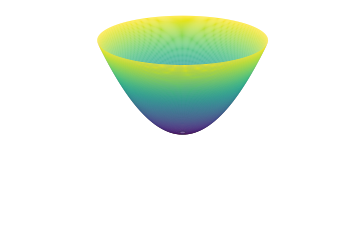

In [36]:
# For a pot potential (prohibited by the Earnshaw theorem)

h = 3 # mm
r0 = 0.5 # mm

r = np.linspace(0, 2, 200)
theta = np.linspace(-0.0*np.pi, 2.0*np.pi, 500)
r, theta = np.meshgrid(r, theta)

X = r*np.cos(theta)
Y = r*np.sin(theta)
Z = pot(X,Y,h,r0)

fig = plt.figure()
ax = plt.axes(projection='3d')
ax.set_zlim(-18, 36)
ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap='viridis', edgecolor='none')
ax.set_axis_off()
plt.savefig('./pot/pot_potential.png',dpi=300)
#plt.close()

In [6]:
# For Paul-trap simulations

phi = 1.0 # V
r = 1.0 # mm
Omega = 2.0 * 3.14 * 0.02 # radHz

x = np.linspace(-3, 3, 300)
y = np.linspace(-3, 3, 300)

X, Y = np.meshgrid(x, y)

for i in range(0,50):

    t = i # s
    Z = 2.0 * np.cos(Omega * t) * saddle(X, Y, phi/2.0, r)

    fig = plt.figure()
    ax = plt.axes(projection='3d')
    ax.set_zlim(-9, 9)
    ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap='viridis', edgecolor='none')
    ax.set_axis_off()
    plt.savefig('./flapping/{:03d}.png'.format(t),dpi=300)
    plt.close()
    
files = sorted(glob.glob('./flapping/*.png'))
images = list(map(lambda file: Image.open(file), files))

images[0].save('flapping_saddle.gif', save_all=True, append_images=images[1:], optimize=False, duration=5, loop=0)

In [7]:
# For mechanical-trap simulations

h = 0.5 # cm
r = 1.0 # cm
Omega = 2.0 * 3.14 * 0.02 # radHz

x = np.linspace(-3, 3, 300)
y = np.linspace(-3, 3, 300)

X, Y = np.meshgrid(x, y)

for i in range(50):

    t = i # s

    X_rot = np.cos(Omega*t)*X + np.sin(Omega*t)*Y
    Y_rot = np.cos(Omega*t)*Y - np.sin(Omega*t)*X

    Z = saddle(X_rot, Y_rot, h, r)

    fig = plt.figure()
    ax = plt.axes(projection='3d')
    ax.set_zlim(-9, 9)
    ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap='viridis', edgecolor='none')
    ax.set_axis_off()
    plt.savefig('./rotation/{:03d}.png'.format(t),dpi=300)
    plt.close()
    
files = sorted(glob.glob('./rotation/*.png'))
images = list(map(lambda file: Image.open(file), files))

images[0].save('rotating_saddle.gif', save_all=True, append_images=images[1:], optimize=False, duration=5, loop=0)

In [4]:
# For mechanical-trap simulations (Axis rotation)

h = 0.5 # cm
r = 1.0 # cm

x = np.linspace(-3, 3, 300)
y = np.linspace(-3, 3, 300)

X, Y = np.meshgrid(x, y)
Z = saddle(X, Y, h, r)

for angle in range(0, 60):
    fig = plt.figure()
    ax = plt.axes(projection='3d')
    ax.set_zlim(-9, 9)
    ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap='viridis', edgecolor='none')
    ax.set_axis_off()
    ax.view_init(30, 6.0*angle)
    plt.draw()
    plt.savefig('./axisrotation/{:03d}.png'.format(angle),dpi=300)
    plt.close()
    
files = sorted(glob.glob('./axisrotation/*.png'))
images = list(map(lambda file: Image.open(file), files))

images[0].save('axisrotating_saddle.gif', save_all=True, append_images=images[1:], optimize=False, duration=5, loop=0)